# Gym Taxi

In [ ]:
#########################################################################
## COMPROBAR GPU ASIGNADA EN COLABORATORY
#########################################################################
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 30 17:08:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    50W / 400W |   9867MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#########################################################################
## MONTAR DRIVE
#########################################################################
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#########################################################################
## LIBRERÍAS NECESARIAS
#########################################################################
import tensorflow as tf
import gym
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from tensorflow.keras.layers import concatenate
from tensorflow.keras import backend as K
import numpy as np
import keras
from keras import layers
import copy
from sklearn.model_selection import train_test_split

import sys

import os
from stable_baselines3.common.vec_env import DummyVecEnv

In [ ]:
############################################################################
## Variables globales
###########################################################################
BATCH_SIZE=32
EPOCHS=10
EPISODES=2500

# Discriminador

 ## Red neuronal del Discriminador

In [ ]:
# Red neuronal del Discriminador
discriminator=keras.Sequential(
    [
        keras.Input(shape=(500,6,1)),
        layers.Conv2D(64,kernel_size=3,strides=2,padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator_net"

)
discriminator.summary()

Model: "discriminator_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 3, 64)        640       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 250, 3, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 2, 128)       73856     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 125, 2, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 32000)             0         
                                                                 
 dropout_1 (Dropout)         (None, 32000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)           

# Generador

## Clase del Generador

In [ ]:
# Clase del Generador: política con su optimizador PPO
# Observesé que cada generador implementa una política distinta, por tanto, se ha decidido llamar a la clase Policy_net en lugar de generator
class Q_learning:
    def __init__(self, env):
        """
        name: string
        env: gym env
        """

        # -Entorno
        self.env=env
        env.reset()

        # -Tablas Q[state,action,episodes]
        self.Q=np.zeros([env.observation_space.n,env.action_space.n])
        self.Q_episodes=EPISODES

        # Nuestro objetivo es obtener un generador que maximice la recompensa
        # Entonces tendriamos un buen Q-learning
        self.rewardMeans=-500
        self.rewards=[]
        self.TotalReward=0

    def getQ(self):
        return Q

    # Escoge la acción aplicando Q-learning, creamos las tablas Q(S,A)^*
    def Q_create(self, episodes=EPISODES, alpha=0.7):

        datos=[]
        self.rewards=[]
        self.Q_episodes=episodes

        # Para cada episodio se obtiene una aproximación Q(estados,acciones) con el algoritmo Q-learning
        for episode in range(0,self.Q_episodes ):
            terminated=False
            R=0.0
            reward=0.0

            state=env.reset()

            # Interactuamos con el Entorno hasta que lleguemos a un estado final
            while terminated!= True:
              ##### PASO 1: Selecionar la mejor acción para el estado actual
              action=np.argmax(Q[state])
              ##### PASO 2: Ejecutar la acción y pasar al estado siguiente, obtener la recompensa de ejecutar dicha acción.
              state2,reward,terminated,info=env.step(action)
              ##### PASO 3: Actualización de tablas Q
              Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])
              ##### PASO 4: Actualización de recompensa acumulada
              R+=reward
              ##### PASO 5: el estado siguiente pasa a ser el estado actual
              state=state2

            self.rewards.append(R)
            self.TotalReward=R

            # Vemos para el episodio, su recompensa acumulada que es lo que se trata de maximizar
            print("Episode  {} Total reward: {}".format(episode,R))

            #Por cada episodio almaceno su condiguración, almaceno la Q obtenida con el Algoritmo
            datos.append(Q)


        self.rewardMeans=sum(self.rewards)/len(self.rewards)

        # Muestro
        plt.plot(range(self.Q_episodes),self.rewards)
        plt.show()

        self.Q=datos

        return datos

    # Escoge la acción aplicando Q-learning
    def Q_create_t(self, episodes=EPISODES, alpha=0.7):

        datos=[]
        self.rewards=[]
        self.Q_episodes=episodes
        # Para cada episodio se obtiene una aproximación Q(estados,acciones) con el algoritmo Q-learning
        for episode in range(0,self.Q_episodes ):
            terminated=False
            R=0.0
            reward=0.0

            state=env.reset()

            # Interactuamos con el Entorno hasta que lleguemos a un estado final
            while terminated!= True:
                ##### PASO 1: Selecionar la mejor acción para el estado actual
                action=np.argmax(Q[state])
                ##### PASO 2: Ejecutar la acción y pasar al estado siguiente, obtener la recompensa de ejecutar dicha acción.
                state2,reward,terminated,info=env.step(action)
                ##### PASO 3: Actualización de tablas Q
                Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])
                ##### PASO 4: Actualización de recompensa acumulada
                R+=reward
                ##### PASO 5: el estado siguiente pasa a ser el estado actual
                state=state2

            self.rewards.append(R)
            self.TotalReward=R

            # Por cada episodio almaceno su condiguración, almaceno la Q obtenida con el Algoritmo
            datos.append(Q)


        self.rewardMeans=sum(self.rewards)/len(self.rewards)

        self.Q=datos

        return datos

    def get_obs(self):
        return self.obs

    def get_TotalReward(self):
        return self.TotalReward

    def get_RewardMean(self):
        return self.rewardMeans



# GAN

Trabaja con las tablas Q como si fuesen imágenes.

**Objetivo**: construir un generador capaz de reproducir tablas Q falsas indistinguibles de las tablas Q reales.

Ya que de esta forma, hemos obtenido politicas falsas puesto que de una tabla Q se puede extraer el comportamiento de una Agente sobre un entorno y un estado específico, simplemente calculando el el la acción que produce un valor maximo un Q[state].

In [ ]:
################################################################################
# Declaramos optimizadores y funciones de pérdida del generador-discriminador
#################################################################################
generator_optimizer = tf.keras.optimizers.Adam(
	learning_rate=0.0001, beta_1=0.5, beta_2=0.9)

discriminator_optimizer =tf.keras.optimizers.Adam(
	learning_rate=0.0001, beta_1=0.5, beta_2=0.9)

def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss

def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)



In [ ]:
####################################################################################################################
# CLASE GAN
####################################################################################################################
class GAN(keras.Model):
    # Constructor
    def __init__(self, discriminator, generator, discriminator_extra_steps=3):
        super().__init__()
        self.discriminator = discriminator
        self.generator=generator
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")
        self.d_steps = discriminator_extra_steps
    # Compila el modelo GAN inicializando los optimizadores y la función de pérdida del modelo GAN
    def compile(self,d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(GAN, self).compile(run_eagerly=True)
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    # Devuelve las métricas obtenidas con el generador y discriminador
    @property
    def metrics(self):
        return [self.d_loss_metric,self.g_loss_metric]

    # Evaluación del Discriminador
    def evaluate_D(self, X_test):
        batch_size = X_test.shape[0]

        Q_fakes=self.generator.Q_create_t(episodes=batch_size)

        fakes = tf.stack(Q_fakes)

        # Compilamos el discriminador como CNN
        self.discriminator.compile(optimizer=self.d_optimizer, loss=self.d_loss_fn, metrics=['accuracy'])

        # Evaluamos como CNN
        loss_real, acc_real=self.discriminator.evaluate(X_test[0:batch_size], tf.ones((batch_size,1)), verbose=1)

        loss_fake, acc_fake=self.discriminator.evaluate(fakes[0:batch_size],tf.ones((batch_size,1)), verbose=1)

        print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100,acc_fake*100))
        print('>Loss real: ')
        print(loss_real)
        print('>Loss fake: ')
        print(loss_fake)


    # Evaluación del generador:
    # --Evaluamos la capacidad que tienen nuestras tablas Q(S,A)^* falsas.
    # --Esto es, vemos como un Agente se comporta en el entorno a partir de la tabla Q(S,A)^*,
    #    simplemente para cada estado que le llegue del entorno, tratara de ejecutar la acción que mayor valor tenga almacenado en la tabla Q(S,A)^*
    # --Recordemos que el valor Q(s,a) almacena la recompensa que de media obtendría un agente cuando ejecuta una determinada acción para un estado determinado
    def evaluate_G(self):
        batch_size = XTest.shape[0]

        # Lista donde amacenaremos la recompensa acumulada de cada episodio.
        # NUESTRO OBJETIVO: Agente aprenda a tomar las acciones que maximicen la recompensa
        rewards=[]

        Q_fakes=self.generator.Q_create_t(episodes=batch_size)

        # Creamos el entorno y lo inicializamos para obtener el estado inicial
        env=gym.make("Taxi-v3",render_mode='rgb_array')

        # Para cada episodio, el Agente se mueve por el Entorno mediante acciones hasta llegar a un estado final
        # siguiendo la política que se ha aprendido en el entrenamiento de la GAN
        for episode in range(EPISODES):
            terminated=False
            R=0.0
            reward=0.0

            # Estado inicial del juego
            state=env.reset()

            #Interactuamos con el Entorno hasta que lleguemos a un estado final
            while terminated!= True:
                action=np.max(Q_fakes[state])
                state,reward,terminated,info=env.step(action)

                # Incremento la recompensa del episodio i al haber ejecutado el step
                R+=reward

            rewards.append(R)
            # Vemos para el episodio, su recompensa acumulada que es lo que se trata de maximizar
            print("Episode  {} Total reward: {}".format(episode,R))

        # Cierro el entorno
        env.close()

        # Muestro las recompensas obtenidas en cada episodio
        plt.plot(range(EPISODES),rewards)
        plt.show()


    def train_step(self, X_train):
        # Ojo no tenemos la misma cantidad de datos verdaderos y falsos, por eso calculamos len_real y len_fakes
        # No podemos controlar la creación de x secuencias [s,a] ya que generaremos tantas secuencias como se
        # necesiten para finalizar el juego
        if isinstance(X_train, tuple):
          X_train = X_train[0]

        batch_size = tf.shape(X_train)[0]

        print(batch_size)


        #######  PASO 1:  ENTRENAMIENTO DEL DISCRIMINADOR ##############################################

        # Entrenamiento del discriminador con las Q falsas y Q reales
        with tf.GradientTape() as tape:

            fakes=self.generator.Q_create_t(episodes=batch_size)

            fakes = tf.stack(fakes)

            fake_logits=self.discriminator(fakes)
            real_logits = self.discriminator(X_train)

            # Calculamos la pérdida del discriminador usando los logits de la tabla Q(s,a) real y falsa
            d_loss = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)

        # Calculo del gradiente y actualización del gradiente
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)

        self.d_optimizer.apply_gradients(
          zip(grads, self.discriminator.trainable_weights)
        )


        ############# PASO 2: ENTRENAMIENTO DEL GENERADOR=POLÍTICA  ##############################

        with tf.GradientTape() as tape:
          # Generamos la imagen falsa a traves del generador
          fakes = self.generator.Q_create_t()

          fakes = tf.stack(fakes)

          # Obtenemos los logits del discriminador en la imagen falsa
          gen_img_logits = self.discriminator(fakes)

          # Calculamos la función de pérdida del generador
          g_loss = self.g_loss_fn(gen_img_logits)


        # Actualizamos la métrica del discriminador
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {"d_loss": self.d_loss_metric.result(),
                    "g_loss": self.g_loss_metric.result()}


# Lectura de base de datos: tablas Q reales

In [ ]:
# Creación de entorno de simulación del juego Taxi-v3, usamos el argumento render_mode='rgb_array' ya que configura
# el modo de renderizado del entorno para que genere una representación en formato de matriz RGB.
env=gym.make("Taxi-v3",render_mode='rgb_array')

# Establecemos el estado inicial del entorno
observation = env.reset()

# Inicialización de la matriz Q
Q=np.zeros([env.observation_space.n,env.action_space.n])

In [ ]:

##################################################################################################################
#  Devuelve una lista con las matrices Q(estados,acciones) obtenidas con el algoritmo Qlearning
#  en cada episodio. Como se ha definido en las variables globales EPISODES=2500, esto es, tendremos 25000 episodios, esta lista tendrá 2500 matrices de la forma
#  (500,6), ya que tenemos 500 estados y 6 acciones en taxi. Más adelante, convertiremos esta lista en un tensor con objeto
#  de poder trabajar con esta en modelos CNN.
#
# Argumentos:
# -env -> Entorno
# -state_inital -> Estado inicial del Agente
# -Q -> Configuración inicial de la matriz Q(estados,acciones).
# -episodes -> numero de episodios, esto es, número de veces que se ejecutarña Q-learning.
#              En cada episodio se obtendrá una matrix Q(estados,acciones).
#
#################################################################################################################
def QLearning(env,Q,episodes,alpha=0.7):
    rewards=[]

    datos=[]


    # Para cada episodio se obtiene una aproximación Q(estados,acciones) con el algoritmo Q-learning
    for episode in range(0,episodes ):
        terminated=False
        R=0.0
        reward=0.0
        state =env.reset()

        #Interactuamos con el Entorno hasta que lleguemos a un estado final
        while terminated!= True:
            action=np.argmax(Q[state])    # Paso 1: Selecionar la mejor acción para el estado actual

            state2,reward,terminated,info=env.step(action)   #Paso 2: Ejecutar la acción y pasar al estado siguiente,obtener la recompensa.

            Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])    #Paso 3: actualización de Q

            R+=reward # Paso 4: Actualización de recompensa acumulada

            state=state2 # Paso 5: el estado siguiente pasa a ser el estado actual

        rewards.append(R)

        #Vemos para el episodio, su recompensa acumulada que es lo que se trata de maximizar
        print("Episode  {} Total reward: {}".format(episode,R))

        #Por cada episodio almaceno su condiguración, almaceno la Q obtenida con el Algoritmo
        datos.append(Q)

    # Muestro
    plt.plot(range(episodes),rewards)
    plt.show()

    return datos


Episode  0 Total reward: -524.0
Episode  1 Total reward: -524.0
Episode  2 Total reward: -596.0
Episode  3 Total reward: -578.0
Episode  4 Total reward: -498.0
Episode  5 Total reward: -524.0
Episode  6 Total reward: -524.0
Episode  7 Total reward: -172.0
Episode  8 Total reward: -578.0
Episode  9 Total reward: -542.0
Episode  10 Total reward: -542.0
Episode  11 Total reward: -326.0
Episode  12 Total reward: -524.0
Episode  13 Total reward: -344.0
Episode  14 Total reward: -140.0
Episode  15 Total reward: -96.0
Episode  16 Total reward: -470.0
Episode  17 Total reward: -200.0
Episode  18 Total reward: -542.0
Episode  19 Total reward: -257.0
Episode  20 Total reward: -452.0
Episode  21 Total reward: -398.0
Episode  22 Total reward: -115.0
Episode  23 Total reward: -50.0
Episode  24 Total reward: -236.0
Episode  25 Total reward: -85.0
Episode  26 Total reward: -596.0
Episode  27 Total reward: -283.0
Episode  28 Total reward: -452.0
Episode  29 Total reward: -200.0
Episode  30 Total rewar

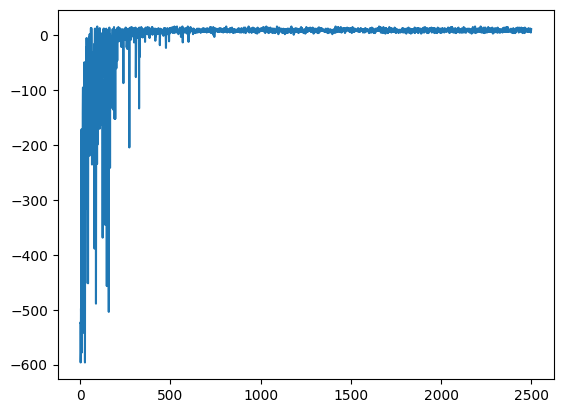

In [ ]:
# datos definirá una lista donde se almacenarán matrices 2D de la forma (500,6), esto es, en cada posición i tendremos
# la matriz Q(estados, acciones) para el episodio i
datos=[]

# Aplico la función Q-learning para obtener la aproximación de las matrices Q(estados, acciones) para los 25 episodios
datos=QLearning(env,Q,EPISODES)

# Cierro el entorno
env.close()

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(datos, test_size=0.2, random_state=0)

# Imprime el número de elementos en el conjuntos de entrenamiento y prueba
print('Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de entrenamiento:', len(X_train))
print('Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de prueba:', len(X_test))


Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de entrenamiento: 2000
Nº de matrices Q(ESTADOS,ACCIONES) en el conjunto de prueba: 500


Transformar los datos de X_train y X_test en tensores de tres dimensiones
* X_train es un tensor de la forma (2000,500,6)
* X_test es un tensor de la forma (500,500,6)

In [ ]:
XTrain=np.zeros((len(X_train),env.observation_space.n,env.action_space.n))
XTest=np.zeros((len(X_test),env.observation_space.n,env.action_space.n))

# Pasar de listas a array numpy con el tamaño que deseamos
for i in range(len(X_train)):
    XTrain[i,:,:]=X_train[i]

for i in range(len(X_test)):
    XTest[i,:,:]=X_test[i]

# Convertir a tensores
XTrain = tf.stack(XTrain)
XTest = tf.stack(XTest)

# EXPERIMENTACIÓN CON LA GENERACIÓN SINTÉTICA DE TABLAS Q-LEARNING A TRAVES DE MODELOS GANS


## Definición de generador y generación de tablas Q falsas

Episode  0 Total reward: 11.0
Episode  1 Total reward: 7.0
Episode  2 Total reward: 5.0
Episode  3 Total reward: 7.0
Episode  4 Total reward: 5.0
Episode  5 Total reward: 5.0
Episode  6 Total reward: 8.0
Episode  7 Total reward: 6.0
Episode  8 Total reward: 9.0
Episode  9 Total reward: 11.0
Episode  10 Total reward: 6.0
Episode  11 Total reward: 11.0
Episode  12 Total reward: 9.0
Episode  13 Total reward: 9.0
Episode  14 Total reward: 7.0
Episode  15 Total reward: 3.0
Episode  16 Total reward: 10.0
Episode  17 Total reward: 14.0
Episode  18 Total reward: 8.0
Episode  19 Total reward: 9.0
Episode  20 Total reward: 8.0
Episode  21 Total reward: 11.0
Episode  22 Total reward: 10.0
Episode  23 Total reward: 5.0
Episode  24 Total reward: 7.0
Episode  25 Total reward: 3.0
Episode  26 Total reward: 6.0
Episode  27 Total reward: 12.0
Episode  28 Total reward: 10.0
Episode  29 Total reward: 6.0
Episode  30 Total reward: 11.0
Episode  31 Total reward: 8.0
Episode  32 Total reward: 10.0
Episode  

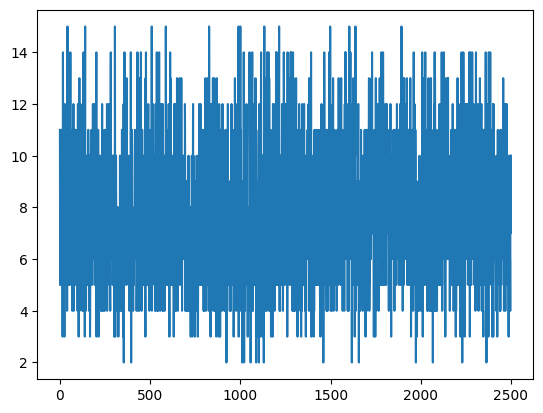

In [ ]:
env=gym.make("Taxi-v3",render_mode='rgb_array')
obs= env.reset()

# Generador
generator=Q_learning(env)

# Creación de datos fasos, tablas Q falsas y vemos por pantalla la recompensa acumulada que tendra cada Q[S,A]
datos_fakes=generator.Q_create()

## Definición de GAN

In [ ]:
gan=GAN(discriminator=discriminator,generator=generator)

## Compilación de GAN

In [ ]:
gan.compile(d_optimizer=discriminator_optimizer,
			 g_optimizer=generator_optimizer,
             g_loss_fn=generator_loss,
             d_loss_fn=discriminator_loss,)


## Entrenamiento de GAN

In [ ]:
# Deshabilitar los mensajes de información de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Deshabilitar los mensajes de información de OpenAI Gym
gym.logger.set_level(40)


# Cambiar batch_size
history=gan.fit(XTrain,
    epochs=EPOCHS, batch_size=2000)#, # callbacks=[WandbCallback()])

Epoch 1/10
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 484s 484s/step - d_loss: 1.7881e-07 - g_loss: -0.4746
Epoch 2/10
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 481s 481s/step - d_loss: 3.1292e-06 - g_loss: -0.4463
Epoch 3/10
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 483s 483s/step - d_loss: -4.7684e-07 - g_loss: -0.4360
Epoch 4/10
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 479s 479s/step - d_loss: 1.1921e-06 - g_loss: -0.4106
Epoch 5/10
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 482s 482s/step - d_loss: -5.0664e-07 - g_loss: -0.4103
Epoch 6/10
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 482s 482s/step - d_loss: -5.0366e-06 - g_loss: -0.5149
Epoch 7/10
tf.Tensor(2000, shape=(), dtype=int32)
1/1 [==============================] - 484s 484s/step - d_loss: -1.1921e-06 - g_loss: -0.

## Evaluación del Discriminador

In [ ]:
# Evaluamos el Discriminador de la GAN en el TEST
gan.evaluate_D(XTest)

16/16 [==============================] - 0s 3ms/step - loss: -0.5648 - accuracy: 0.0000e+00
>Accuracy real: 0%, fake: 0%
>Loss real: 
-0.5648270845413208
>Loss fake: 
-0.5648264288902283


## Evaluación del Generador

Episode  0 Total reward: 8.0
Episode  1 Total reward: 8.0
Episode  2 Total reward: 14.0
Episode  3 Total reward: 12.0
Episode  4 Total reward: 5.0
Episode  5 Total reward: 9.0
Episode  6 Total reward: 12.0
Episode  7 Total reward: 8.0
Episode  8 Total reward: 6.0
Episode  9 Total reward: 6.0
Episode  10 Total reward: 6.0
Episode  11 Total reward: 12.0
Episode  12 Total reward: 8.0
Episode  13 Total reward: 9.0
Episode  14 Total reward: 10.0
Episode  15 Total reward: 6.0
Episode  16 Total reward: 6.0
Episode  17 Total reward: 10.0
Episode  18 Total reward: 5.0
Episode  19 Total reward: 6.0
Episode  20 Total reward: 13.0
Episode  21 Total reward: 7.0
Episode  22 Total reward: 7.0
Episode  23 Total reward: 11.0
Episode  24 Total reward: 5.0
Episode  25 Total reward: 8.0
Episode  26 Total reward: 8.0
Episode  27 Total reward: 9.0
Episode  28 Total reward: 5.0
Episode  29 Total reward: 5.0
Episode  30 Total reward: 7.0
Episode  31 Total reward: 7.0
Episode  32 Total reward: 6.0
Episode  33 

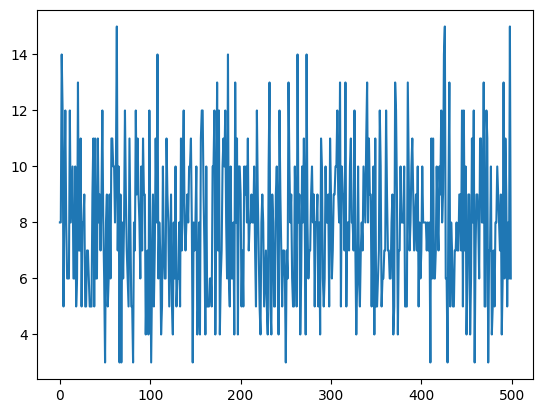

In [ ]:
# Evaluamos el modelo GENERADOR en el TEST


batch_size = XTest.shape[0]
# Lista donde amacenaremos la recompensa acumulada de cada episodio.
# NUESTRO OBJETIVO: Agente aprenda a tomar las acciones que maximicen la recompensa
rewards=[]

Q_fakes=generator.Q_create_t(episodes=batch_size)

# Convertir a tensores
Q_fakes = tf.stack(Q_fakes)

# Creamos el entorno y lo inicializamos para obtener el estado inicial
env=gym.make("Taxi-v3",render_mode='rgb_array')


# Para cada episodio, el Agente se mueve por el Entorno mediante acciones hasta llegar a un estado final
# siguiendo la política que se ha aprendido en el entrenamiento de la GAN
for episode in range(batch_size):
    terminated=False
    R=0.0
    reward=0.0

    # Estado inicial del juego
    state=env.reset()

    #Interactuamos con el Entorno hasta que lleguemos a un estado final
    while terminated!= True:
        action= np.where(Q_fakes[episode,state] == np.max(Q_fakes[episode,state]) )
        state,reward,terminated,info=env.step(action[0][0])

        # Incremento la recompensa del episodio i al haber ejecutado el step
        R+=reward

    rewards.append(R)
    # Vemos para el episodio, su recompensa acumulada que es lo que se trata de maximizar
    print("Episode  {} Total reward: {}".format(episode,R))

# Cierro el entorno
env.close()

# Muestro las recompensas obtenidas en cada episodio
plt.plot(range(batch_size),rewards)
plt.show()
